In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

### Zadanie 1

In [4]:
path1 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/fontanna1.jpg'
path2 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/fontanna2.jpg'

# path3 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/budynek1.jpg'
# path4 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/budynek2.jpg'

# path5 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/eiffel1.jpg'
# path6 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/eiffel2.jpg'

img1 = cv2.imread(path1, cv2.IMREAD_COLOR_RGB); gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(path2, cv2.IMREAD_COLOR_RGB); gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# img3 = cv2.imread(path3, cv2.IMREAD_COLOR_RGB); gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
# img4 = cv2.imread(path4, cv2.IMREAD_COLOR_RGB); gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

# img5 = cv2.imread(path5, cv2.IMREAD_COLOR_RGB); gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
# img6 = cv2.imread(path6, cv2.IMREAD_COLOR_RGB); gray6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)

In [5]:
from scipy.signal import convolve2d
import scipy.ndimage.filters as filters
from scipy.ndimage import maximum_filter


def find_max (image , size , threshold):
    data_max = filters.maximum_filter(image, size)
    maxima = ( image == data_max )
    diff = image > threshold
    maxima [ diff == 0] = 0
    return np . nonzero ( maxima )


def harris(img, ksize=7, k=0.05, aff = False):
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.float32(img)

    if aff:
        mean_img = np.mean(img)
        std_img = np.std(img)

        img -=  mean_img
        img /= std_img

    sobel_X = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=ksize)
    sobel_Y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=ksize)

    I_x2 = sobel_X ** 2
    I_y2 = sobel_Y ** 2
    I_xy = sobel_X * sobel_Y

    S_x2 = cv2.GaussianBlur(I_x2, (ksize, ksize), sigmaX=1)
    S_y2 = cv2.GaussianBlur(I_y2, (ksize, ksize), sigmaX=1)
    S_xy = cv2.GaussianBlur(I_xy, (ksize, ksize), sigmaX=1)

    det_M = (S_x2 * S_y2) - (S_xy ** 2)
    trace_M = S_x2 + S_y2
    R = det_M - k * (trace_M ** 2)

    R_norm = cv2.normalize(R, None, 0, 1, cv2.NORM_MINMAX)
    #R_uint8 = np.uint8(R_norm)

    return R_norm

In [6]:
def plot_with_star(img, maxis, ax):
    ax.imshow(img)
    for y, x in zip(*maxis):
        ax.plot(x, y, marker='*', color='lime', markersize=4)

    ax.axis('off')

/tmp/ipykernel_12706/1705786023.py:7: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


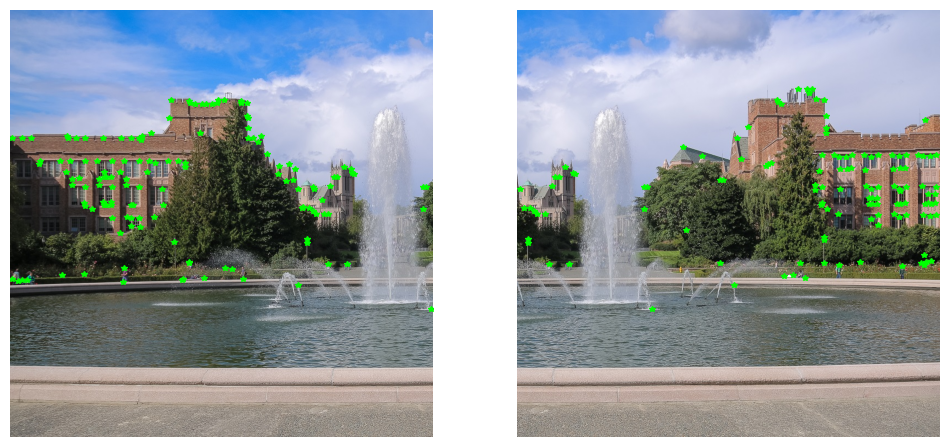

In [7]:
ksize = 7
thres = 0.5

H1 = harris(img1, ksize=ksize); H2 = harris(img2, ksize=ksize)
maxis1 = find_max(H1, size=ksize-1, threshold=thres); maxis2 = find_max(H2, size=ksize-1, threshold=thres)

# H3 = harris(img3, ksize=ksize); H4 = harris(img4, ksize=ksize)
# maxis3 = find_max(H3, size=ksize-1, threshold=thres); maxis4 = find_max(H4, size=ksize-1, threshold=thres)

# H5 = harris(img5, ksize=ksize); H6 = harris(img6, ksize=ksize)
# maxis5 = find_max(H5, size=ksize-1, threshold=thres); maxis6 = find_max(H6, size=ksize-1, threshold=thres)

fig, ax = plt.subplots(1, 2, figsize=(12, 16))
ax = ax.flatten()
plot_with_star(img1, maxis1, ax[0]); plot_with_star(img2, maxis2, ax[1])
# plot_with_star(img3, maxis3, ax[2]); plot_with_star(img4, maxis4, ax[3])
# plot_with_star(img5, maxis5, ax[4]); plot_with_star(img6, maxis6, ax[5])

/tmp/ipykernel_12706/1705786023.py:7: DeprecationWarning: Please import `maximum_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  data_max = filters.maximum_filter(image, size)


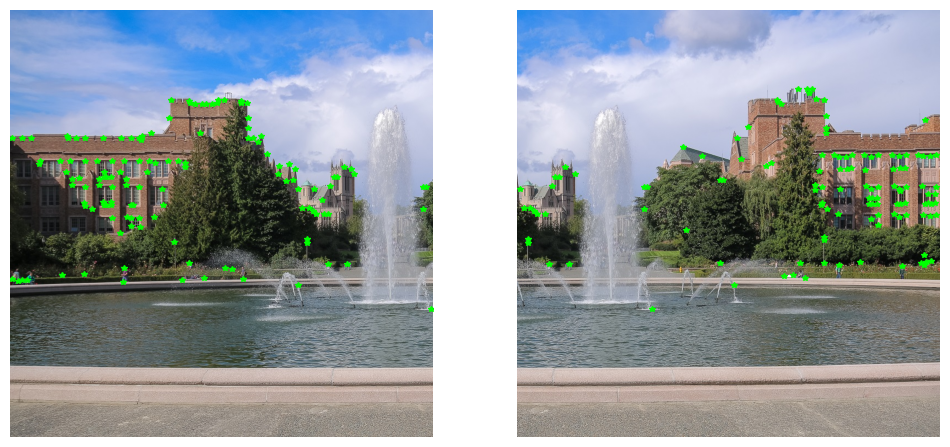

In [8]:
ksize = 7
thres = 0.5

H1 = harris(img1, ksize=ksize, aff=True) 
H2 = harris(img2, ksize=ksize, aff=True)
maxis1 = find_max(H1, size=ksize, threshold=thres)
maxis2 = find_max(H2, size=ksize, threshold=thres)

# H3 = harris(img3, ksize=ksize, aff=True); H4 = harris(img4, ksize=ksize, aff=True)
# maxis3 = find_max(H3, size=ksize-1, threshold=thres); maxis4 = find_max(H4, size=ksize-1, threshold=thres)

# H5 = harris(img5, ksize=ksize, aff=True); H6 = harris(img6, ksize=ksize, aff=True)
# maxis5 = find_max(H5, size=ksize-1, threshold=thres); maxis6 = find_max(H6, size=ksize-1, threshold=thres)

fig, ax = plt.subplots(1, 2, figsize=(12, 16))
ax = ax.flatten()
plot_with_star(img1, maxis1, ax[0]); plot_with_star(img2, maxis2, ax[1])
# plot_with_star(img3, maxis3, ax[2]); plot_with_star(img4, maxis4, ax[3])
# plot_with_star(img5, maxis5, ax[4]); plot_with_star(img6, maxis6, ax[5])

### Zadanie 2

In [9]:
def describe_points(img, points, size=15):
    X, Y = img.shape

    # Filtraca
    filtered_points = list(filter(
        lambda pt: pt[0] >= size and pt[0] < X - size and pt[1] >= size and pt[1] < Y - size,
        points
    ))

    # Wyciannaie otoczenia
    patches = [
        img[pt[0]-size : pt[0]+size+1, pt[1]-size : pt[1]+size+1] for pt in filtered_points
    ]

    return list(zip(patches, filtered_points))


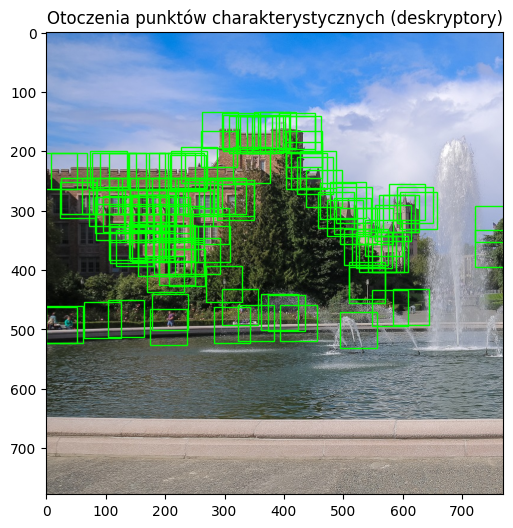

In [10]:
descriptors1 = describe_points(gray1, list(zip(*maxis1)), size=15)
#descriptors2 = describe_points(gray2, list(zip(*maxis2)), size=20)
descriptors2 = describe_points(gray2, list(zip(*maxis2)), size=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img1, cmap='gray')

size = 30

for _, (y, x) in descriptors1:
    rect = plt.Rectangle((x - size, y - size), 2 * size + 1, 2 * size + 1,
                         edgecolor='lime', facecolor='none', linewidth=1)
    ax.add_patch(rect)

ax.set_title("Otoczenia punktów charakterystycznych (deskryptory)")
plt.show()

In [11]:
def compare_describe(desc1, desc2, compare_type='distance'):
    """
    Porównuje dwa zbiory wycinków obrazu. Dopasowania są unikalne – każdy punkt z desc2 może być dopasowany tylko raz.

    @Param:
        desc1 : zbiór otoczeń 1 (lista: [(opis, współrzędne)])
        desc2 : zbiór otoczeń 2 (lista: [(opis, współrzędne)])
        n : liczba najbardziej podobnych par
        compare_type : typ metryki porównania ('distance', 'abs_value', 'dot')

    @return:
        lista krotek (cord1, cord2, score)
    """
    results = []

    # Zamiana na wektory
    # vector1 = [(desc.flatten(), cord) for desc, cord in desc1]
    # vector2 = [(desc.flatten(), cord) for desc, cord in desc2]

    # vector2 = vector2[::-1]
    used_indices = set()

    for vec1, cord1 in desc1:
        best_match = None
        best_score = None
        best_index = None

        for i, (vec2, cord2) in enumerate(desc2):
            if i in used_indices:
                continue  # pomijamy już sparowane punkty

            if compare_type == 'distance':
                score = np.linalg.norm(vec1.astype("float32") - vec2.astype("float32"), 1)
            elif compare_type == 'abs_value':
                score = np.sum(np.abs(vec1 - vec2))
            elif compare_type == 'dot':
                score = np.dot(vec1, vec2)
            else:
                raise ValueError('Invalid compare_type')

            # if best_match is None or (
            #     (compare_type == 'dot' and score > best_score) or
            #     (compare_type != 'dot' and score < best_score)
            # ):
            #     best_score = score
            #     best_match = (cord1, cord2, score)
            #     best_index = i

        # if best_match is not None:
            results.append([cord1, cord2, score])
            # used_indices.add(best_index)

    results = sorted(results, key=lambda x: x[2])[:20]

    return results


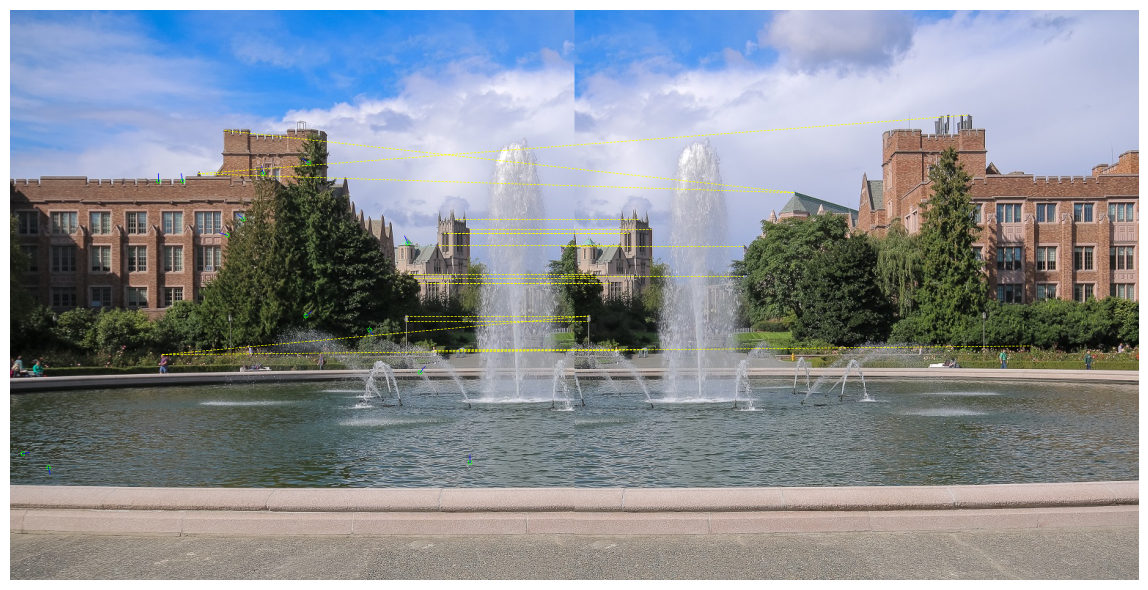

In [24]:
compers = compare_describe(descriptors1, descriptors2, compare_type='distance')
# compers = compare_descriptions(descriptors1, descriptors2, n=20)

joined_img = np.hstack((img1, img2))

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(joined_img)
ax.axis('off')

img1_width = img1.shape[1]

for cord1, cord2, _ in compers:
    #rect1 = patches.Rectangle((cord1[1] - size, cord1[0] - size),
  #                            2*size+1, 2*size+1, edgecolor='r', facecolor='none')
   # 
    #rect2 = patches.Rectangle((cord2[1] + img1_width - size, cord2[0] - size),
   #                           2*size+1, 2*size+1, edgecolor='c', facecolor='none')

  #  ax.add_patch(rect1)
  #  ax.add_patch(rect2)

    # Linia między punktami
    x1, y1 = cord1[1], cord1[0]
    x2, y2 = cord2[1] + img1_width, cord2[0]

    ax.plot([x1, x2], [y1, y2], color='yellow', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### zad 3 (ORB)

### Implementacja metody ORB z wykorzystaniem Numba. Nie wspera ona natywnie cv2 przez co konieczne jest implentacja wszyskiego ręcznie

In [13]:
import numpy as np
from numba import njit

@njit
def harris_response(region, k=0.04):
    Ix = np.zeros_like(region)
    Iy = np.zeros_like(region)
    h, w = region.shape

    # Sobel-like gradient
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            Ix[y, x] = (region[y, x+1] - region[y, x-1]) * 0.5
            Iy[y, x] = (region[y+1, x] - region[y-1, x]) * 0.5

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    Sxx = np.sum(Ixx)
    Syy = np.sum(Iyy)
    Sxy = np.sum(Ixy)

    det = (Sxx * Syy) - (Sxy * Sxy)
    trace = Sxx + Syy

    return det - k * trace * trace

@njit
def intensity_centroid(region):
    m00 = 0.0
    m10 = 0.0
    m01 = 0.0

    h, w = region.shape
    cx, cy = w // 2, h // 2

    for y in range(h):
        for x in range(w):
            I = region[y, x]
            dx = x - cx
            dy = y - cy
            m00 += I
            m10 += dx * I
            m01 += dy * I

    if m00 == 0:
        return 0.0
    x_c = m10 / m00
    y_c = m01 / m00
    theta = np.arctan2(y_c, x_c)
    return theta

@njit
def brief_descriptor(region, pairs):
    desc = np.zeros(32, dtype=np.uint8)  # 256 bits
    for i in range(32):
        byte = 0
        for j in range(8):
            idx = i * 8 + j
            u = pairs[idx][0]
            v = pairs[idx][1]
            if region[u[1], u[0]] < region[v[1], v[0]]:
                byte |= 1 << (7 - j)
        desc[i] = byte
    return desc

@njit
def generate_brief_pairs(n=256, patch_size=31):
    np.random.seed(42)
    pairs = np.empty((n, 2, 2), dtype=np.int32)
    for i in range(n):
        u = (np.random.randint(0, patch_size), np.random.randint(0, patch_size))
        v = (np.random.randint(0, patch_size), np.random.randint(0, patch_size))
        pairs[i, 0] = u
        pairs[i, 1] = v
    return pairs

BRIEF_PAIRS = generate_brief_pairs()

@njit(parallel=True)
def ORB(img, t=100, ksize=7, n=9, alpha=0.3, N=500):
    h, w = img.shape
    half_k = ksize // 2
    r = (ksize - 1) / 2
    mask = np.zeros((ksize, ksize), dtype=np.uint8)

    for i in range(ksize):
        for j in range(ksize):
            dist = np.sqrt((i - half_k)**2 + (j - half_k)**2)
            if abs(dist - r) <= alpha:
                mask[i, j] = 1

    keypoints = []

    for y in range(half_k, h - half_k):
        for x in range(half_k, w - half_k):
            region = img[y - half_k:y + half_k + 1, x - half_k:x + half_k + 1].astype(np.float32)
            c = img[y, x]
            ctn_up = 0
            ctn_down = 0

            for i in range(ksize):
                for j in range(ksize):
                    if mask[i, j]:
                        if region[i, j] < c - t:
                            ctn_up += 1
                        if region[i, j] > c + t:
                            ctn_down += 1

            if ctn_up >= n or ctn_down >= n:
                keypoints.append((x, y))

    # Harris ranking
    scores = []
    for kp in keypoints:
        x, y = kp
        patch = img[y - half_k:y + half_k + 1, x - half_k:x + half_k + 1]
        score = harris_response(patch)
        scores.append((score, x, y))

    scores.sort(reverse=True)
    selected = scores[:N]

    result = []
    patch_size = 31
    half_patch = patch_size // 2
    for score, x, y in selected:
        if x - half_patch < 0 or y - half_patch < 0 or x + half_patch >= w or y + half_patch >= h:
            continue
        patch = img[y - half_patch:y + half_patch + 1, x - half_patch:x + half_patch + 1].astype(np.float32)
        angle = intensity_centroid(patch)
        desc = brief_descriptor(patch, BRIEF_PAIRS)
        result.append((x, y, angle, desc))

    return result


In [14]:
keypoints1 = ORB(gray1, t=30, ksize=19, n=20, alpha=0.5, N=100)
keypoints2 = ORB(gray2, t=30, ksize=19, n=20, alpha=0.5, N=100)

len(keypoints1)

98

98
22


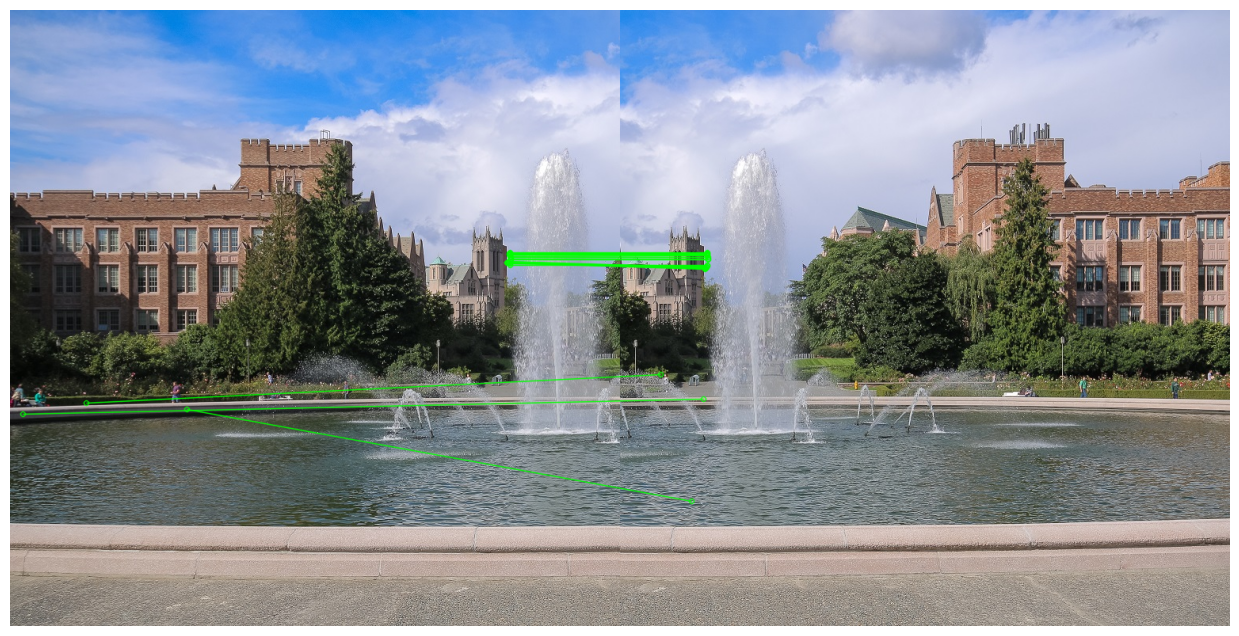

In [15]:
def draw_matches(img1, keypoints1, img2, keypoints2):
    kp1 = [cv2.KeyPoint(x=k[0], y=k[1], size=100) for k in keypoints1]  # Poprawiamy na size
    kp2 = [cv2.KeyPoint(x=k[0], y=k[1], size=100) for k in keypoints2]  # Poprawiamy na size

    print(len(kp1))

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    matches = bf.match(np.array([k[3] for k in keypoints1], dtype=np.uint8), 
                       np.array([k[3] for k in keypoints2], dtype=np.uint8))
    
    print(len(matches))
    
    matches = sorted(matches, key = lambda x:x.distance)

    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], outImg=None, 
                                  matchColor=(0,255,0), singlePointColor=(255,0,0), flags=2)

    return img_matches


img_matches = draw_matches(img1, keypoints1, img2, keypoints2)

plt.figure(figsize=(16, 8))
plt.imshow(img_matches)
plt.axis('off')
plt.show()

(-0.5, 769.5, 777.5, -0.5)

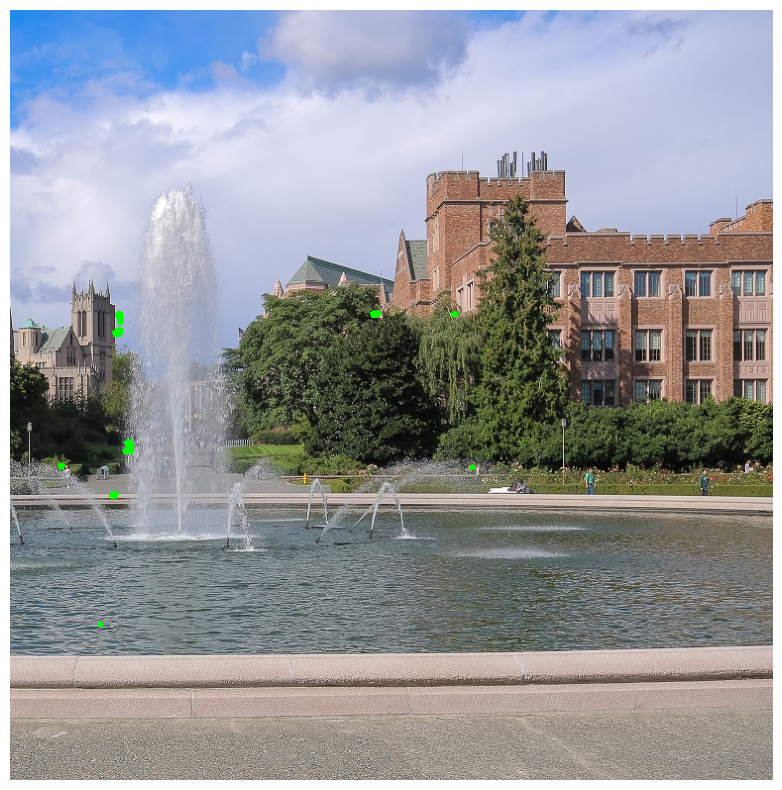

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)
for x, y, _, _ in keypoints2:
    plt.plot(x, y, marker='*', color='lime', markersize=4)

plt.axis('off')

### Implementacja bez Numby z wykrozystaniem cv2

In [17]:
def intensity_centroid(region):
    h, w = region.shape
    cx, cy = w // 2, h // 2

    m00 = np.sum(region)
    if m00 == 0:
        return 0.0

    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    dx = X - cx
    dy = Y - cy

    m10 = np.sum(dx * region)
    m01 = np.sum(dy * region)

    x_c = m10 / m00
    y_c = m01 / m00

    return np.arctan2(y_c, x_c)


def generate_brief_pairs(n=256, patch_size=31):
    np.random.seed(42)
    pairs = np.random.randint(0, patch_size, (n, 2, 2))
    return pairs


def brief_descriptor(region, pairs):
    desc = np.zeros(32, dtype=np.uint8)
    for i in range(32):
        byte = 0
        for j in range(8):
            idx = i * 8 + j
            u = pairs[idx][0]
            v = pairs[idx][1]
            if region[u[1], u[0]] < region[v[1], v[0]]:
                byte |= 1 << (7 - j)
        desc[i] = byte
    return desc


def ORB(img, t=100, ksize=7, n=9, alpha=0.3, N=500):
    h, w = img.shape
    half_k = ksize // 2
    r = (ksize - 1) / 2
    mask = np.zeros((ksize, ksize), dtype=np.uint8)

    for i in range(ksize):
        for j in range(ksize):
            dist = np.sqrt((i - half_k) ** 2 + (j - half_k) ** 2)
            if abs(dist - r) <= alpha:
                mask[i, j] = 1

    keypoints = []

    for y in range(half_k, h - half_k):
        for x in range(half_k, w - half_k):
            region = img[y - half_k:y + half_k + 1, x - half_k:x + half_k + 1]
            c = img[y, x]
            ctn_up = 0
            ctn_down = 0

            for i in range(ksize):
                for j in range(ksize):
                    if mask[i, j]:
                        if region[i, j] < c - t:
                            ctn_up += 1
                        if region[i, j] > c + t:
                            ctn_down += 1

            if ctn_up >= n or ctn_down >= n:
                keypoints.append((x, y))

    # Harris scoring
    scores = []
    for kp in keypoints:
        x, y = kp
        patch = img[y - half_k:y + half_k + 1, x - half_k:x + half_k + 1]
        R_map = harris(patch)
        score = R_map[ksize // 2, ksize // 2] / 255  # <-- FIX: pojedynczy skalar
        scores.append((score, x, y))

    scores.sort(reverse=True)
    selected = scores[:N]

    BRIEF_PAIRS = generate_brief_pairs()
    patch_size = 31
    half_patch = patch_size // 2
    result = []

    for score, x, y in selected:
        if x - half_patch < 0 or y - half_patch < 0 or x + half_patch >= w or y + half_patch >= h:
            continue
        patch = img[y - half_patch:y + half_patch + 1, x - half_patch:x + half_patch + 1]
        angle = intensity_centroid(patch)
        desc = brief_descriptor(patch, BRIEF_PAIRS)
        result.append((x, y, angle, desc))

    return result

In [18]:
keypoints = ORB(gray1, t=50, ksize=7, n=9, alpha=0.3, N=20)

### Zadanie4 Funkcja wbudowana

(-0.5, 815.5, 708.5, -0.5)

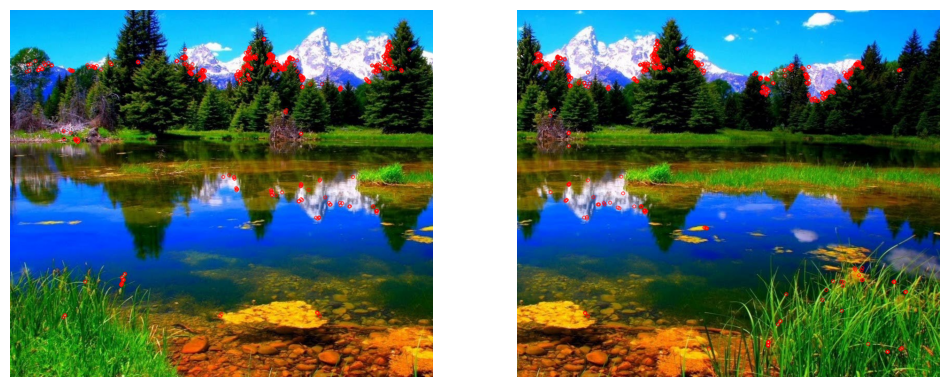

In [20]:
path7 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/right_panorama.jpg'
path8 = '/home/plorenc/Desktop/AiR_ISS/AVS/materialy_feature_points/left_panorama.jpg'

img7 = cv2.imread(path7, cv2.IMREAD_COLOR_RGB); gray7 = cv2.cvtColor(img7, cv2.COLOR_RGB2GRAY)
img8 = cv2.imread(path8, cv2.IMREAD_COLOR_RGB); gray8 = cv2.cvtColor(img8, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create() # Inicjacja instancji klasy

kp7 = orb.detect(gray7, None); kp8 = orb.detect(gray8, None)
kp7, des7 = orb.compute(gray7, kp7); kp8, des8 = orb.compute(gray8, kp8); 

img7_copy = img7.copy(); img8_copy = img8.copy()
img7_copy = cv2.drawKeypoints(img7_copy, kp7, None, color=(255,0, 0), flags=0); img8_copy = cv2.drawKeypoints(img8_copy, kp8, None, color=(255,0,0), flags=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img7_copy); axs[0].axis('off')
axs[1].imshow(img8_copy); axs[1].axis('off')

### Zapytać bo coś nie działa

(-0.5, 1633.5, 709.5, -0.5)

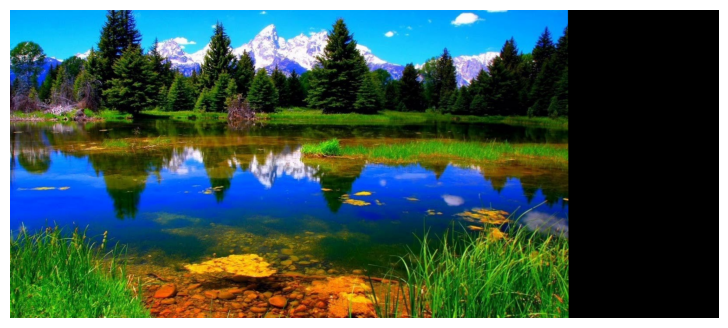

In [21]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.knnMatch(des7, des8, k=2)

best_matches = [[m] for m, n, *rest in matches if m.distance < 0.5 * n.distance]

matched_img = cv2.drawMatchesKnn(img7, kp7, img8, kp8, best_matches, None, flags=2)

keypointsL = np.float32([kp.pt for kp in kp7])
keypointsR = np.float32([kp.pt for kp in kp8])

ptsA = np.float32([kp7[m[0].queryIdx].pt for m in best_matches])
ptsB = np.float32([kp8[m[0].trainIdx].pt for m in best_matches])

H, _ = cv2.findHomography(ptsB, ptsA, cv2.RANSAC)

height, width = img7.shape[:2]  
result = cv2.warpPerspective(img8, H, (img7.shape[1] + img8.shape[1], img7.shape[0]))

result[0:img7.shape[0], 0:img7.shape[1]] = img7

plt.figure(figsize=(12, 4))
plt.imshow(result)
plt.axis('off')


### Zadanie 1 Dodatkowe SIFT

(-0.5, 1539.5, 777.5, -0.5)

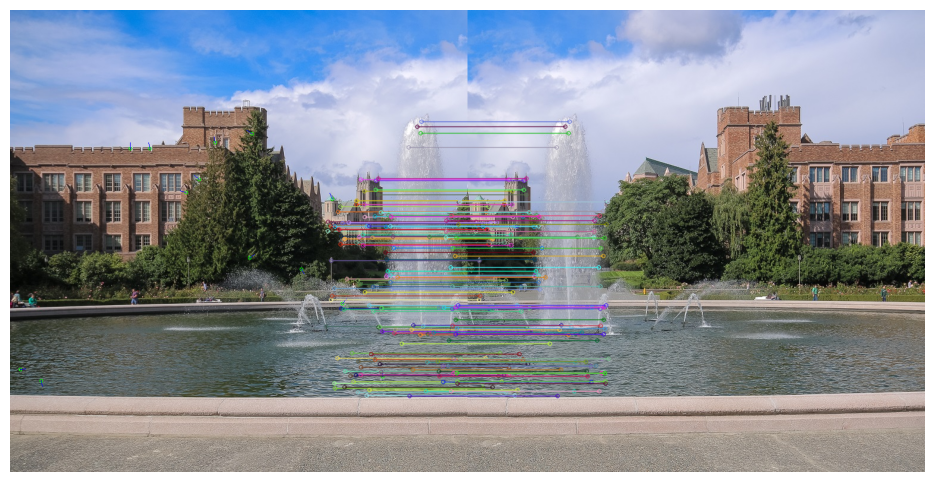

In [22]:
sift = cv2.SIFT_create()
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(desc1, desc2, k=2)

best_matches = [[m] for m, n in matches if m.distance < 0.1 * n.distance]

result = cv2.drawMatchesKnn(img1, kp1, img2, kp2, best_matches, None, flags=2)

plt.figure(figsize=(12,6))
plt.imshow(result)
plt.axis('off')
